In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
#import keras

import time
import pickle

%matplotlib inline

print("All imported successfully!")

All imported successfully!


In [2]:
#Read data

train_file = "Data/zip_train.txt"

train_data = pd.read_csv(train_file, sep=' ', header = None)
print("train shape:", train_data.shape)
print(type(train_data))
print(train_data.head(3))

train shape: (7291, 258)
<class 'pandas.core.frame.DataFrame'>
   0    1    2    3      4      5      6      7      8      9   ...     248  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 ...   0.823   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 ...  -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 ...  -1.000   

     249    250    251    252    253    254    255  256  257  
0  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  NaN  
1 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  NaN  
2 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  NaN  

[3 rows x 258 columns]


In [3]:
#for some reason there is an extra column at the end where all the values seemed like nonzero. 
# We can safely drop that one, but just checking if it indeed has all nonzeroes, or if there are 
# any other missing value in any other column.

print(train_data.isnull().sum(axis = 0).nonzero())

(array([257]),)


In [4]:
#drop last column
train_data.drop([257], axis = 1, inplace = True)
print("train shape:", train_data.shape)
print(train_data.head(3))

train shape: (7291, 257)
   0    1    2    3      4      5      6      7      8      9   ...     247  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 ...   0.304   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 ...  -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 ...  -1.000   

     248    249    250    251    252    253    254    255  256  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  

[3 rows x 257 columns]


In [5]:
#read test file

test_file = "Data/zip_test.txt"

test_data = pd.read_csv(test_file, sep=' ', header = None)
print("test shape:", test_data.shape)
print(type(test_data))
print(test_data.head(3))


test shape: (2007, 258)
<class 'pandas.core.frame.DataFrame'>
   0    1    2    3    4      5    6      7      8      9   ...   248    249  \
0    9  NaN -1.0 -1.0 -1.0 -1.000 -1.0 -0.948 -0.561  0.148 ...  -1.0 -0.908   
1    6  NaN -1.0 -1.0 -1.0 -1.000 -1.0 -1.000 -1.000 -1.000 ...  -1.0 -1.000   
2    3  NaN -1.0 -1.0 -1.0 -0.593  0.7  1.000  1.000  1.000 ...   1.0  0.717   

     250    251    252  253  254  255  256  257  
0  0.430  0.622 -0.973 -1.0 -1.0 -1.0 -1.0 -1.0  
1 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0 -1.0 -1.0  
2  0.333  0.162 -0.393 -1.0 -1.0 -1.0 -1.0 -1.0  

[3 rows x 258 columns]


In [6]:
#check for null values
print(test_data.isnull().sum(axis = 0).nonzero()) 
#test_data.isnull().sum(axis = 0)



(array([1]),)


In [7]:
#this time the column 1 is null, so drop it.
test_data.drop([1], axis = 1, inplace = True)
print("test shape:", test_data.shape)
print(test_data.head(3))


test shape: (2007, 257)
   0    2    3    4      5    6      7      8      9      10  ...   248  \
0    9 -1.0 -1.0 -1.0 -1.000 -1.0 -0.948 -0.561  0.148  0.384 ...  -1.0   
1    6 -1.0 -1.0 -1.0 -1.000 -1.0 -1.000 -1.000 -1.000 -1.000 ...  -1.0   
2    3 -1.0 -1.0 -1.0 -0.593  0.7  1.000  1.000  1.000  1.000 ...   1.0   

     249    250    251    252  253  254  255  256  257  
0 -0.908  0.430  0.622 -0.973 -1.0 -1.0 -1.0 -1.0 -1.0  
1 -1.000 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0 -1.0 -1.0  
2  0.717  0.333  0.162 -0.393 -1.0 -1.0 -1.0 -1.0 -1.0  

[3 rows x 257 columns]


In [8]:
#count frequency of each label

z_train = Counter(train_data[0])
print(sorted(z_train.items()))

[(0.0, 1194), (1.0, 1005), (2.0, 731), (3.0, 658), (4.0, 652), (5.0, 556), (6.0, 664), (7.0, 645), (8.0, 542), (9.0, 644)]


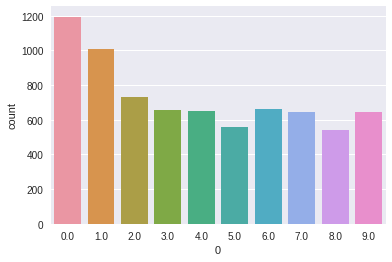

In [9]:
sns.countplot(train_data[0])

In [10]:
z_test = Counter(test_data[0])
print(sorted(z_test.items()))

[(0, 359), (1, 264), (2, 198), (3, 166), (4, 200), (5, 160), (6, 170), (7, 147), (8, 166), (9, 177)]


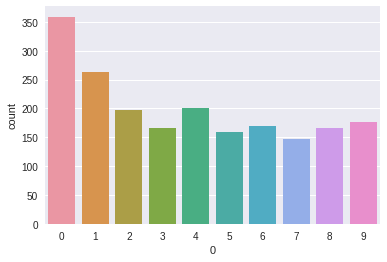

In [11]:
sns.countplot(test_data[0])

In [12]:
#get x and y datasets

x_train = (train_data.iloc[:, 1:].values).astype("float32")
y_train = (train_data.iloc[:, 0].values).astype("int32")
x_test = (test_data.iloc[:, 1:].values).astype("float32")
y_test = (test_data.iloc[:, 0].values).astype("int32")

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7291, 256)
(7291,)
(2007, 256)
(2007,)


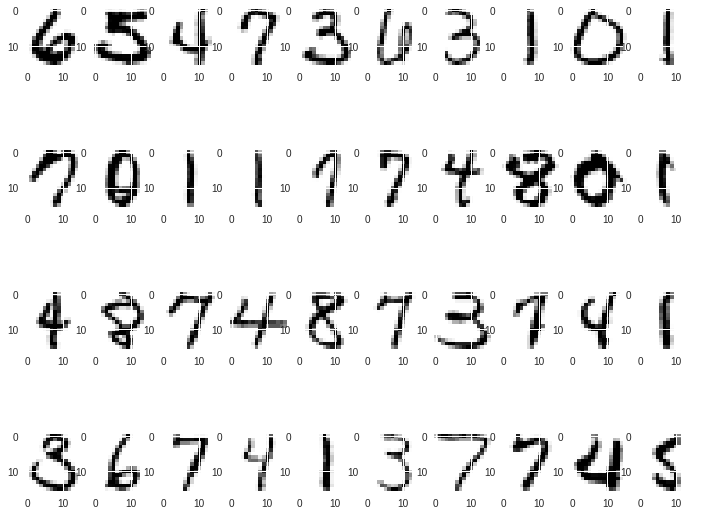

In [13]:
%matplotlib inline
#visualize some of the digits

plt.figure(figsize = (12,10))
x,y = 10,4
for i in range(40):
    plt.subplot(y,x,i+1)
    plt.imshow(x_train[i].reshape((16,16)), interpolation = "nearest")
plt.show()